# L1 and L2 Regularizations

* Check the effects of L1 and L2 Regularizations in the model, and see if it really avoids overfitting of the model.

In [2]:
from keras.datasets import mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

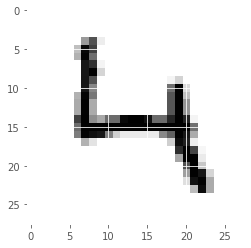

In [5]:
def show_image(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

show_image(train_data[2032])

In [6]:
import numpy as np

In [7]:
x_train = np.asarray(train_data).astype('float32').reshape(60000, -1) / 255.0
x_test = np.asarray(test_data).astype('float32').reshape(10000, -1) / 255.0
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Shuffle data and sample validation set

In [8]:
RANDOM_SEED = 10
np.random.seed(RANDOM_SEED)

In [9]:
ind = np.arange(0, 60000)
np.random.shuffle(ind)

In [10]:
x_train_shuffled = x_train[ind]
y_train_shuffled = y_train[ind]

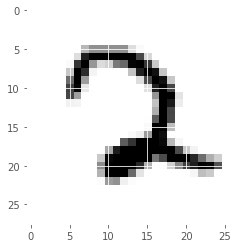

In [11]:
# Check if its shuffled using the same sample number: 2032
show_image(x_train_shuffled[2032].reshape(28, 28))

In [12]:
NUM_VAL = 10000
x_val = x_train_shuffled[:NUM_VAL]
x_train_partial = x_train_shuffled[NUM_VAL:]
y_val = y_train_shuffled[:NUM_VAL]
y_train_partial = y_train_shuffled[NUM_VAL:]

In [13]:
x_train_partial.shape

(50000, 784)

## Adding Weight Regularization

In [14]:
from keras import layers, models

#### Add baseline Model

In [49]:
## Add Baseline Model
base = models.Sequential()
base.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
base.add(layers.Dense(256, activation='relu'))
base.add(layers.Dense(10, activation='softmax'))
base.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
             metrics=['acc'])
base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras import regularizers

#### Add Regularized model

In [50]:
## l2 model
WEIGHT_DECAY = 0.001

model_l2 = models.Sequential()
model_l2.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                         kernel_regularizer=regularizers.l2(WEIGHT_DECAY)))
model_l2.add(layers.Dense(256, activation='relu',
            kernel_regularizer=regularizers.l2(WEIGHT_DECAY)))
model_l2.add(layers.Dense(10, activation='softmax'))
model_l2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
             metrics=['acc'])

## l1 model
WEIGHT_DECAY_L1 = 0.001

model_l1 = models.Sequential()
model_l1.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                         kernel_regularizer=regularizers.l1(WEIGHT_DECAY_L1)))
model_l1.add(layers.Dense(256, activation='relu',
            kernel_regularizer=regularizers.l1(WEIGHT_DECAY_L1)))
model_l1.add(layers.Dense(10, activation='softmax'))
model_l1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
             metrics=['acc'])

# Combined L1 + L2

model_l1l2 = models.Sequential()
model_l1l2.add(layers.Dense(512, activation='relu', input_shape=(28*28,),
                         kernel_regularizer=regularizers.l1_l2(l1=WEIGHT_DECAY_L1, l2=WEIGHT_DECAY)))
model_l1l2.add(layers.Dense(256, activation='relu',
            kernel_regularizer=regularizers.l1_l2(l1=WEIGHT_DECAY_L1, l2=WEIGHT_DECAY)))
model_l1l2.add(layers.Dense(10, activation='softmax'))
model_l1l2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [51]:
EPOCHS = 100

### Train the network

In [52]:
hist_base = base.fit(x_train_partial, y_train_partial,
                    epochs=EPOCHS, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.4114 - acc: 0.8736 - val_loss: 0.2087 - val_acc: 0.9346
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.1520 - acc: 0.9543 - val_loss: 0.1166 - val_acc: 0.9633
Epoch 3/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0965 - acc: 0.9702 - val_loss: 0.0921 - val_acc: 0.9717
Epoch 4/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0658 - acc: 0.9797 - val_loss: 0.0879 - val_acc: 0.9735
Epoch 5/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0482 - acc: 0.9850 - val_loss: 0.0763 - val_acc: 0.9760
Epoch 6/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0826 - val_acc: 0.9775
Epoch 7/100
50000/50000 [==============================] - 2s 31us/step - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0859 - 

50000/50000 [==============================] - 1s 24us/step - loss: 9.4627e-04 - acc: 0.9998 - val_loss: 0.1553 - val_acc: 0.9831
Epoch 60/100
50000/50000 [==============================] - 1s 25us/step - loss: 9.7993e-04 - acc: 0.9997 - val_loss: 0.1698 - val_acc: 0.9820
Epoch 61/100
50000/50000 [==============================] - 1s 25us/step - loss: 6.6505e-04 - acc: 0.9998 - val_loss: 0.1646 - val_acc: 0.9815
Epoch 62/100
50000/50000 [==============================] - 1s 24us/step - loss: 5.2410e-04 - acc: 0.9998 - val_loss: 0.1588 - val_acc: 0.9829
Epoch 63/100
50000/50000 [==============================] - 1s 24us/step - loss: 7.2077e-04 - acc: 0.9999 - val_loss: 0.1629 - val_acc: 0.9820
Epoch 64/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.1717 - val_acc: 0.9810
Epoch 65/100
50000/50000 [==============================] - 1s 24us/step - loss: 9.9348e-04 - acc: 0.9997 - val_loss: 0.1680 - val_acc: 0.9807
Epoch 66/100
500

In [53]:
hist_l2 = model_l2.fit(x_train_partial, y_train_partial,
                    epochs=EPOCHS, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.0312 - acc: 0.8655 - val_loss: 0.6604 - val_acc: 0.9339
Epoch 2/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5548 - acc: 0.9427 - val_loss: 0.4927 - val_acc: 0.9426
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.4022 - acc: 0.9545 - val_loss: 0.3407 - val_acc: 0.9631
Epoch 4/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.3171 - acc: 0.9619 - val_loss: 0.3285 - val_acc: 0.9499
Epoch 5/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.2674 - acc: 0.9665 - val_loss: 0.2523 - val_acc: 0.9692
Epoch 6/100
50000/50000 [==============================] - 2s 31us/step - loss: 0.2362 - acc: 0.9691 - val_loss: 0.2924 - val_acc: 0.9486
Epoch 7/100
50000/50000 [==============================] - 2s 31us/step - loss: 0.2130 - acc: 0.9720 - val_loss: 0.2001 - 

50000/50000 [==============================] - 1s 28us/step - loss: 0.0821 - acc: 0.9907 - val_loss: 0.1347 - val_acc: 0.9736
Epoch 60/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0798 - acc: 0.9908 - val_loss: 0.2122 - val_acc: 0.9465
Epoch 61/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0818 - acc: 0.9904 - val_loss: 0.1112 - val_acc: 0.9807
Epoch 62/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0784 - acc: 0.9916 - val_loss: 0.1114 - val_acc: 0.9802
Epoch 63/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0790 - acc: 0.9909 - val_loss: 0.1244 - val_acc: 0.9767
Epoch 64/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0780 - acc: 0.9914 - val_loss: 0.1334 - val_acc: 0.9752
Epoch 65/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0793 - acc: 0.9910 - val_loss: 0.1136 - val_acc: 0.9809
Epoch 66/100
50000/50000 [==============

In [54]:
hist_l1 = model_l1.fit(x_train_partial, y_train_partial,
                    epochs=EPOCHS, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 39us/step - loss: 7.0726 - acc: 0.8053 - val_loss: 2.5810 - val_acc: 0.8595
Epoch 2/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.9384 - acc: 0.8549 - val_loss: 1.5569 - val_acc: 0.8610
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.3345 - acc: 0.8788 - val_loss: 1.2325 - val_acc: 0.8627
Epoch 4/100
50000/50000 [==============================] - 1s 28us/step - loss: 1.1032 - acc: 0.8958 - val_loss: 1.0324 - val_acc: 0.9020
Epoch 5/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.9816 - acc: 0.9053 - val_loss: 0.9415 - val_acc: 0.9130
Epoch 6/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.9111 - acc: 0.9131 - val_loss: 0.8932 - val_acc: 0.9107
Epoch 7/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.8628 - acc: 0.9164 - val_loss: 0.8381 - 

50000/50000 [==============================] - 1s 28us/step - loss: 0.5699 - acc: 0.9559 - val_loss: 0.6169 - val_acc: 0.9425
Epoch 60/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.5688 - acc: 0.9554 - val_loss: 0.5804 - val_acc: 0.9500
Epoch 61/100
50000/50000 [==============================] - 2s 30us/step - loss: 0.5674 - acc: 0.9551 - val_loss: 0.5915 - val_acc: 0.9483
Epoch 62/100
50000/50000 [==============================] - 1s 29us/step - loss: 0.5649 - acc: 0.9563 - val_loss: 0.5860 - val_acc: 0.9491
Epoch 63/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5657 - acc: 0.9559 - val_loss: 0.5937 - val_acc: 0.9445
Epoch 64/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5638 - acc: 0.9560 - val_loss: 0.5807 - val_acc: 0.9516
Epoch 65/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.5634 - acc: 0.9565 - val_loss: 0.5828 - val_acc: 0.9475
Epoch 66/100
50000/50000 [==============

In [55]:
hist_l1l2 = model_l1l2.fit(x_train_partial, y_train_partial,
                    epochs=EPOCHS, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 42us/step - loss: 7.2334 - acc: 0.8030 - val_loss: 2.4799 - val_acc: 0.8572
Epoch 2/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.8883 - acc: 0.8567 - val_loss: 1.5212 - val_acc: 0.8589
Epoch 3/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.3260 - acc: 0.8796 - val_loss: 1.2074 - val_acc: 0.8818
Epoch 4/100
50000/50000 [==============================] - 2s 30us/step - loss: 1.1156 - acc: 0.8939 - val_loss: 1.0418 - val_acc: 0.9012
Epoch 5/100
50000/50000 [==============================] - 2s 30us/step - loss: 0.9997 - acc: 0.9024 - val_loss: 0.9475 - val_acc: 0.9112
Epoch 6/100
50000/50000 [==============================] - 2s 30us/step - loss: 0.9275 - acc: 0.9082 - val_loss: 0.9039 - val_acc: 0.9099
Epoch 7/100
50000/50000 [==============================] - 2s 30us/step - loss: 0.8756 - acc: 0.9163 - val_loss: 0.8514 - 

50000/50000 [==============================] - 1s 29us/step - loss: 0.5871 - acc: 0.9520 - val_loss: 0.5921 - val_acc: 0.9486
Epoch 60/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5857 - acc: 0.9516 - val_loss: 0.5978 - val_acc: 0.9492
Epoch 61/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5848 - acc: 0.9516 - val_loss: 0.5999 - val_acc: 0.9479
Epoch 62/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5840 - acc: 0.9517 - val_loss: 0.6124 - val_acc: 0.9449
Epoch 63/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5822 - acc: 0.9519 - val_loss: 0.6037 - val_acc: 0.9468
Epoch 64/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5809 - acc: 0.9527 - val_loss: 0.5929 - val_acc: 0.9495
Epoch 65/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.5801 - acc: 0.9524 - val_loss: 0.6186 - val_acc: 0.9420
Epoch 66/100
50000/50000 [==============

### Evaluate the models

In [56]:
eval_base = base.evaluate(x_test, y_test)
eval_l2 = model_l2.evaluate(x_test, y_test)
eval_l1 = model_l1.evaluate(x_test, y_test)
eval_l1l2 = model_l1l2.evaluate(x_test, y_test)
print("Base model: {}\nl2 model: {}\nl1 model: {}\nl1l2 model: {}".format(eval_base, eval_l2,
                                                                         eval_l1, eval_l1l2))

10000/10000 [==============================] - 1s 75us/step
Base model: [0.15715788942361905, 0.983]
l2 model: [0.12123360965251923, 0.974]
l1 model: [0.5468545459270477, 0.9558]
l1l2 model: [0.575813232088089, 0.9481]


## Visualize the Accuracy and Loss in Validation set

In [57]:
histories = [hist_base.history, hist_l2.history, hist_l1.history, hist_l1l2.history]
titles = ["Base model", "L2 model", "L1 model", "L1L2 model"]

acc = [hist["acc"] for hist in histories]
loss = [hist["loss"] for hist in histories]
val_acc = [hist["val_acc"] for hist in histories]
val_loss = [hist["val_loss"] for hist in histories]

In [58]:
epochs = range(1, len(acc[0])+1)
colors_o = ["bo", "go", "ro", "co"]
colors = ["b", "g", "r", "c"]

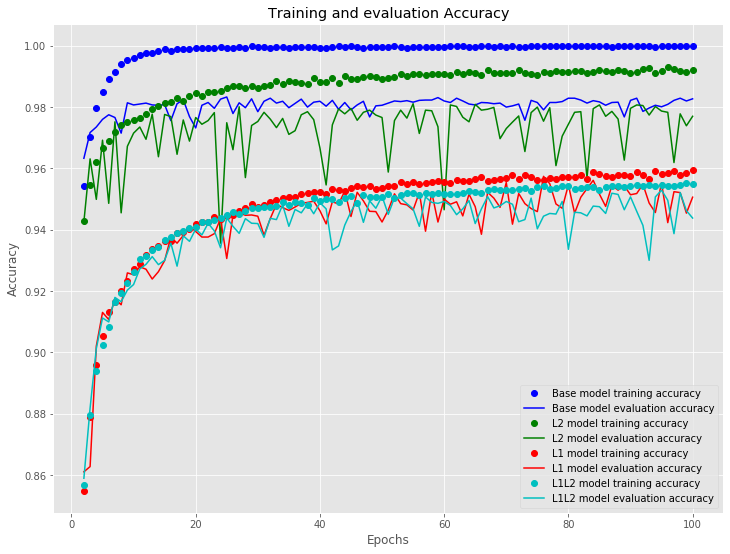

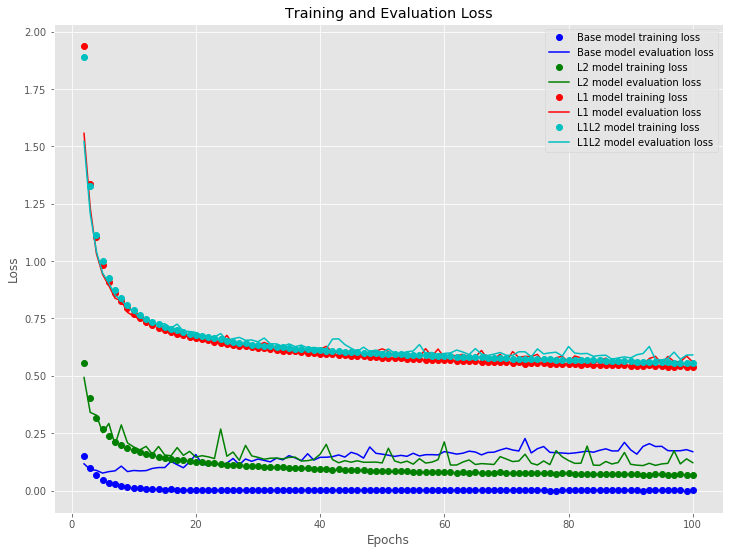

In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
for i in range(len(acc)):
    plt.plot(epochs[1:], acc[i][1:], colors_o[i], label=titles[i]+" training accuracy")
    plt.plot(epochs[1:], val_acc[i][1:], colors[i], label=titles[i]+" evaluation accuracy")


plt.title("Training and evaluation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


for i in range(len(acc)):
    plt.plot(epochs[1:], loss[i][1:], colors_o[i], label=titles[i]+" training loss")
    plt.plot(epochs[1:], val_loss[i][1:], colors[i], label=titles[i]+" evaluation loss")


plt.title("Training and Evaluation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Conclusion:
Based on the figure above, I can clearly see that using **Regularization** truly avoids the effect of
*overfitting* due to **Over-training** or **high number of epochs**. However, using both types of regularization
increases the loss metrics (l1 and l1l2 has significantly greater loss) and therefore decreasing also the Accuracy (in the fact that the base line model still has the highest Validation Accuracy).

With this observation, I conclude that, still, it is *better* to just **early stop** the model to avoid *overfitting* than to use regularization in predicting MNIST dataset with the given hyperparameters.